In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

from bs4 import BeautifulSoup

import re

print('Libraries imported.')

done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_1         3.1 MB  conda-forge
    certifi-2018.10.15         |        py36_1000         138 KB  conda-forge
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge
    conda-4.5.11               |        py36_1000         651 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0            conda-forge
    geopy:           1.17.0-py_0          

In [2]:
myList=list()
res = requests.get("http://www.citypopulation.de/php/greece-attiki.php")                                                  
soup = BeautifulSoup(res.text, 'lxml') 
table = soup.find("table", class_="data")

for items in table.find_all("tr")[:-1]:
    data = [' '.join(item.text.split()) for item in items.find_all(['th','td'])]
    myList.append(data)
print(myList)

[['Name', 'Native', 'Status', 'PopulationCensus1991-03-17', 'PopulationCensus2001-03-18', 'PopulationCensus2011-03-16', ''], ['Dímos Acharnón [Acharnae]', 'Δήμος Αχαρνών', 'Municipality', '65,035', '82,555', '106,943', '→'], ['Dímos Agías Paraskevís [Agia Paraskevi]', 'Δήμος Αγίας Παρασκευής', 'Municipality', '48,557', '60,065', '59,704', '→'], ['Dímos Agías Varváras [Agia Varvara]', 'Δήμος Αγίας Βαρβάρας', 'Municipality', '29,426', '31,354', '26,550', '→'], ['Dímos Agíon Anargýron - Kamateroú [Agii Anargyri]', 'Δήμος Αγίων Αναργύρων - Καματερού', 'Municipality', '49,577', '58,244', '62,529', '→'], ['Dímos Agíou Dimitríou [Agios Dimitrios]', 'Δήμος Αγίου Δημητρίου', 'Municipality', '59,662', '68,719', '71,294', '→'], ['Dímos Agkistríou [Angistri, Agistri]', 'Δήμος Αγκιστρίου', 'Municipality', '755', '886', '1,142', '→'], ['Dímos Aigáleo [Egaleo]', 'Δήμος Αιγάλεω', 'Municipality', '81,607', '77,917', '69,946', '→'], ['Dímos Aíginas [Aegina]', 'Δήμος Αίγινας', 'Municipality', '11,103', '

In [3]:
data_transposed = zip(*myList)
df = pd.DataFrame(myList, columns=['Municipality', 'Native', 'Status', 'Population1991', 'Population2001', 'Population2011', 'tot'])
df.head()


,Municipality,Native,Status,Population1991,Population2001,Population2011,tot
0,Name,Native,Status,PopulationCensus1991-03-17,PopulationCensus2001-03-18,PopulationCensus2011-03-16,
1,Dímos Acharnón [Acharnae],Δήμος Αχαρνών,Municipality,"65,035","82,555","106,943",→
2,Dímos Agías Paraskevís [Agia Paraskevi],Δήμος Αγίας Παρασκευής,Municipality,"48,557","60,065","59,704",→
3,Dímos Agías Varváras [Agia Varvara],Δήμος Αγίας Βαρβάρας,Municipality,"29,426","31,354","26,550",→
4,Dímos Agíon Anargýron - Kamateroú [Agii Anargyri],Δήμος Αγίων Αναργύρων - Καματερού,Municipality,"49,577","58,244","62,529",→


In [4]:
df=df.tail(-1)
df.head(10)

,Municipality,Native,Status,Population1991,Population2001,Population2011,tot
1,Dímos Acharnón [Acharnae],Δήμος Αχαρνών,Municipality,"65,035","82,555","106,943",→
2,Dímos Agías Paraskevís [Agia Paraskevi],Δήμος Αγίας Παρασκευής,Municipality,"48,557","60,065","59,704",→
3,Dímos Agías Varváras [Agia Varvara],Δήμος Αγίας Βαρβάρας,Municipality,"29,426","31,354","26,550",→
4,Dímos Agíon Anargýron - Kamateroú [Agii Anargyri],Δήμος Αγίων Αναργύρων - Καματερού,Municipality,"49,577","58,244","62,529",→
5,Dímos Agíou Dimitríou [Agios Dimitrios],Δήμος Αγίου Δημητρίου,Municipality,"59,662","68,719","71,294",→
6,"Dímos Agkistríou [Angistri, Agistri]",Δήμος Αγκιστρίου,Municipality,755,886,"1,142",→
7,Dímos Aigáleo [Egaleo],Δήμος Αιγάλεω,Municipality,"81,607","77,917","69,946",→
8,Dímos Aíginas [Aegina],Δήμος Αίγινας,Municipality,"11,103","12,716","13,056",→
9,Dímos Alímou [Alimos],Δήμος Αλίμου,Municipality,"32,514","39,800","41,720",→
10,Dímos Amarousíou [Marousi],Δήμος Αμαρουσίου,Municipality,"64,083","71,551","72,333",→


In [5]:
df = df.reset_index(drop=True)

In [6]:
df.head(10)

,Municipality,Native,Status,Population1991,Population2001,Population2011,tot
0,Dímos Acharnón [Acharnae],Δήμος Αχαρνών,Municipality,"65,035","82,555","106,943",→
1,Dímos Agías Paraskevís [Agia Paraskevi],Δήμος Αγίας Παρασκευής,Municipality,"48,557","60,065","59,704",→
2,Dímos Agías Varváras [Agia Varvara],Δήμος Αγίας Βαρβάρας,Municipality,"29,426","31,354","26,550",→
3,Dímos Agíon Anargýron - Kamateroú [Agii Anargyri],Δήμος Αγίων Αναργύρων - Καματερού,Municipality,"49,577","58,244","62,529",→
4,Dímos Agíou Dimitríou [Agios Dimitrios],Δήμος Αγίου Δημητρίου,Municipality,"59,662","68,719","71,294",→
5,"Dímos Agkistríou [Angistri, Agistri]",Δήμος Αγκιστρίου,Municipality,755,886,"1,142",→
6,Dímos Aigáleo [Egaleo],Δήμος Αιγάλεω,Municipality,"81,607","77,917","69,946",→
7,Dímos Aíginas [Aegina],Δήμος Αίγινας,Municipality,"11,103","12,716","13,056",→
8,Dímos Alímou [Alimos],Δήμος Αλίμου,Municipality,"32,514","39,800","41,720",→
9,Dímos Amarousíou [Marousi],Δήμος Αμαρουσίου,Municipality,"64,083","71,551","72,333",→


In [7]:
df.shape


(66, 7)

Let's clean oyr dataframe:
Comumns "Native", "Status", "Population1991", "Population2001", and "tot" are not needed  

In [8]:
df.drop(["Native", "Status", "Population1991", "Population2001", "tot"], axis=1, inplace=True)

In [9]:
df.head(10)

,Municipality,Population2011
0,Dímos Acharnón [Acharnae],"106,943"
1,Dímos Agías Paraskevís [Agia Paraskevi],"59,704"
2,Dímos Agías Varváras [Agia Varvara],"26,550"
3,Dímos Agíon Anargýron - Kamateroú [Agii Anargyri],"62,529"
4,Dímos Agíou Dimitríou [Agios Dimitrios],"71,294"
5,"Dímos Agkistríou [Angistri, Agistri]","1,142"
6,Dímos Aigáleo [Egaleo],"69,946"
7,Dímos Aíginas [Aegina],"13,056"
8,Dímos Alímou [Alimos],"41,720"
9,Dímos Amarousíou [Marousi],"72,333"


From "Municipality" columns, we keep only names inside brackets


In [10]:
df['Municipality']=df['Municipality'].apply(lambda st: st[st.find("[")+1:st.find("]")])
df.head(5)


,Municipality,Population2011
0,Acharnae,"106,943"
1,Agia Paraskevi,"59,704"
2,Agia Varvara,"26,550"
3,Agii Anargyri,"62,529"
4,Agios Dimitrios,"71,294"


Customer is only interesting to specific muicipaities:
Agia Paraskevi, Agios Dimitrios, Alimos,Marousi,Chalandri,Dafni-Ymittos,Elliniko-Argyroupoli,Filothei-Psychiko,Galatsi
Glyfada,Ilioupoli,Irakleio, Kessariani, Kallithea, Kifisia, Lykovrysi-Pefki, Metamorfosi, Nea Ionia, Nea Smyrni,Palaio Faliro
Papagou-Cholargos, Penteli, Vari-Voula-Vouliagmeni, Vrilissia, Vyronas and Zografos

READ CSV file that has the geographical coordinates of each above Municipality 


In [11]:
csv=pd.read_csv("coordinates.csv", delimiter=';', 
                 header = 0)
csv

,Municipality,Latitude,Longitude
0,Agia Paraskevi,38.012630,23.820550
1,Agios Dimitrios,37.936670,23.733200
2,Alimos,37.913680,23.715060
3,Marousi,38.054570,23.807500
4,Chalandri,38.021530,23.798270
5,Dafni-Ymittos,37.950140,23.734320
6,Elliniko-Argyroupoli,37.911070,23.749140
7,Filothei-Psychiko,38.012420,23.772500
8,Galatsi,38.012620,23.753180
9,Glyfada,37.862820,23.753440


In [12]:
csv.shape

(26, 3)

Now, we have to merge csv dataframe with df"Population2011" 

In [13]:
result = pd.merge(csv, df, how='inner', on=['Municipality', 'Municipality'])

In [14]:
result.head(3)

,Municipality,Latitude,Longitude,Population2011
0,Agia Paraskevi,38.01263,23.82055,"59,704"
1,Agios Dimitrios,37.93667,23.73320,"71,294"
2,Alimos,37.91368,23.71506,"41,720"


In [15]:
print (result.dtypes)

Municipality       object
Latitude          float64
Longitude         float64
Population2011     object
dtype: object


In [16]:
result['Population2011'] = result.Population2011.str.replace(',', '.').astype(float)

In [17]:
print (result.dtypes)

Municipality       object
Latitude          float64
Longitude         float64
Population2011    float64
dtype: object


In [18]:
result

,Municipality,Latitude,Longitude,Population2011
0,Agia Paraskevi,38.012630,23.820550,59.704
1,Agios Dimitrios,37.936670,23.733200,71.294
2,Alimos,37.913680,23.715060,41.720
3,Marousi,38.054570,23.807500,72.333
4,Chalandri,38.021530,23.798270,74.192
5,Dafni-Ymittos,37.950140,23.734320,33.628
6,Elliniko-Argyroupoli,37.911070,23.749140,51.356
7,Filothei-Psychiko,38.012420,23.772500,26.968
8,Galatsi,38.012620,23.753180,59.345
9,Glyfada,37.862820,23.753440,87.305


Let's explore map of interested regions-municilities of Attica, Grece, that we are interesting to open Pharmacy

In [19]:
# define the world map centered around interested Municipalities
attica_map = folium.Map(location=[38.08333, 23.5], zoom_start=10)

# instantiate a feature group for the incidents in the dataframe
regions = folium.map.FeatureGroup()

# loop through the Municipalities and get their coordiunates
for lat, lng, m in zip(result.Latitude, result.Longitude, result.Municipality):
    regions.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            popup= m,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
attica_map.add_child(regions)

#### Define Foursquare Credentials and Version

In [20]:
CLIENT_ID = '10GTYZCZW3GIIJJ4QUGBRRMDM4YF3X5YCXHTMQ2MU3OBWTGI' # your Foursquare ID
CLIENT_SECRET = 'MCIKTZ0SUMMGJLX10XVEIR5DSMVCJCDI1OWT0GQJUJVPZ13B' # your Foursquare Secret
VERSION = '20180604' # Foursquare API version
LIMIT = 100
radius = 4000
locale = "en"

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 10GTYZCZW3GIIJJ4QUGBRRMDM4YF3X5YCXHTMQ2MU3OBWTGI
CLIENT_SECRET:MCIKTZ0SUMMGJLX10XVEIR5DSMVCJCDI1OWT0GQJUJVPZ13B


Let's examine all competitors Pharmacies for location Municipality "Marousi":

In [21]:
latitude = 38.054570
longitude = 23.807500

In [22]:
search_query = 'Pharmacy'
categoryId = '4bf58dd8d48988d10f951735'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&locale={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT, locale, categoryId)
url 


'https://api.foursquare.com/v2/venues/search?client_id=10GTYZCZW3GIIJJ4QUGBRRMDM4YF3X5YCXHTMQ2MU3OBWTGI&client_secret=MCIKTZ0SUMMGJLX10XVEIR5DSMVCJCDI1OWT0GQJUJVPZ13B&ll=38.05457,23.8075&v=20180604&query=Pharmacy&radius=4000&limit=100&locale=en&categoryId=4bf58dd8d48988d10f951735'

In [23]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5be5b6ccf594df67396b3626'},
 'response': {'venues': [{'id': '4e15c602d164535f061e4b3e',
    'name': 'Pharmacy',
    'location': {'address': 'Πλατεία Ευτέρπης 1-5',
     'lat': 38.05615156,
     'lng': 23.80503747,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.05615156,
       'lng': 23.80503747}],
     'distance': 278,
     'postalCode': '151 24',
     'cc': 'GR',
     'city': 'Marousi',
     'state': 'Attica',
     'country': 'Greece',
     'formattedAddress': ['Πλατεία Ευτέρπης 1-5',
      '151 24 Marousi, Attica',
      'Greece']},
    'categories': [{'id': '4bf58dd8d48988d10f951735',
      'name': 'Pharmacy',
      'pluralName': 'Pharmacies',
      'shortName': 'Pharmacy',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/shops/pharmacy_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1541781196',
    'hasPerk': False},
   {'id': '53932729498ecd20b19c9a70',
    'name': "Maria Vasileiadou's

In [24]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4e15c602d164535f061e4b3e,Πλατεία Ευτέρπης 1-5,GR,Marousi,Greece,NaN,278,"[Πλατεία Ευτέρπης 1-5, 151 24 Marousi, Attica,...","[{'label': 'display', 'lat': 38.05615156, 'lng...",38.056152,23.805037,151 24,Attica,Pharmacy,v-1541781196
1,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,53932729498ecd20b19c9a70,7 Athanasiou Diakou,GR,Pefki,Greece,Kolokotroni,1238,"[7 Athanasiou Diakou (Kolokotroni), 151 21 Pef...","[{'label': 'display', 'lat': 38.05550132667722...",38.055501,23.793424,151 21,NaN,Maria Vasileiadou's Pharmacy,v-1541781196
2,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,4cc5564d3d7fa1cd3eeeb05f,NaN,GR,NaN,Greece,NaN,193,[Greece],"[{'label': 'display', 'lat': 38.056198, 'lng':...",38.056198,23.808268,NaN,NaN,Pharmacy Petmeza,v-1541781196
3,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,553696e8498ec1ab7dc1ca8f,Κηφισίας 76-78,GR,Marousi,Greece,NaN,833,"[Κηφισίας 76-78, 151 25 Marousi, Attica, Greece]","[{'label': 'display', 'lat': 38.047085, 'lng':...",38.047085,23.807857,151 25,Attica,Dr. Pharmacy,v-1541781196
4,"[{'id': '4bf58dd8d48988d10f951735', 'name': 'P...",False,51f2a2b8498e813080048818,NaN,GR,Chalandri,Greece,NaN,3693,"[Chalandri, Attica, Greece]","[{'label': 'display', 'lat': 38.02199624323447...",38.021996,23.799477,NaN,Attica,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),v-1541781196


Define information of interest and filter dataframe

In [25]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df_pharmacy = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_pharmacy['categories'] = df_pharmacy.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_pharmacy.columns = [column.split('.')[-1] for column in df_pharmacy.columns]

df_pharmacy

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Pharmacy,Pharmacy,Πλατεία Ευτέρπης 1-5,GR,Marousi,Greece,NaN,278,"[Πλατεία Ευτέρπης 1-5, 151 24 Marousi, Attica,...","[{'label': 'display', 'lat': 38.05615156, 'lng...",38.056152,23.805037,151 24,Attica,4e15c602d164535f061e4b3e
1,Maria Vasileiadou's Pharmacy,Pharmacy,7 Athanasiou Diakou,GR,Pefki,Greece,Kolokotroni,1238,"[7 Athanasiou Diakou (Kolokotroni), 151 21 Pef...","[{'label': 'display', 'lat': 38.05550132667722...",38.055501,23.793424,151 21,NaN,53932729498ecd20b19c9a70
2,Pharmacy Petmeza,Pharmacy,NaN,GR,NaN,Greece,NaN,193,[Greece],"[{'label': 'display', 'lat': 38.056198, 'lng':...",38.056198,23.808268,NaN,NaN,4cc5564d3d7fa1cd3eeeb05f
3,Dr. Pharmacy,Pharmacy,Κηφισίας 76-78,GR,Marousi,Greece,NaN,833,"[Κηφισίας 76-78, 151 25 Marousi, Attica, Greece]","[{'label': 'display', 'lat': 38.047085, 'lng':...",38.047085,23.807857,151 25,Attica,553696e8498ec1ab7dc1ca8f
4,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),Pharmacy,NaN,GR,Chalandri,Greece,NaN,3693,"[Chalandri, Attica, Greece]","[{'label': 'display', 'lat': 38.02199624323447...",38.021996,23.799477,NaN,Attica,51f2a2b8498e813080048818
5,Pharmacy 56,Pharmacy,Λεωφ. Κηφισίας 56,GR,Marousi,Greece,NaN,1245,"[Λεωφ. Κηφισίας 56, 151 25 Marousi, Attica, Gr...","[{'label': 'display', 'lat': 38.04357763429802...",38.043578,23.804841,151 25,Attica,4fb0f30be4b0771d835c356b
6,Pharmacy,Pharmacy,Λεωφόρος Ειρήνης,GR,Pefki,Greece,NaN,1305,"[Λεωφόρος Ειρήνης, Pefki, Attica, Greece]","[{'label': 'display', 'lat': 38.05759464804378...",38.057595,23.793110,NaN,Attica,5089566be4b0a098387fb56c
7,Novo Pharmacy,Pharmacy,Ηρακλείτου 2,GR,Chalandri,Greece,Μπενάκη,4297,"[Ηρακλείτου 2 (Μπενάκη), Chalandri, Attica, Gr...","[{'label': 'display', 'lat': 38.02461892458301...",38.024619,23.838436,NaN,Attica,5235a09911d2d732a16b398f
8,Pharmacy,Pharmacy,Olympou 58,GR,Athens,Greece,Ioanninon,3291,"[Olympou 58 (Ioanninon), 152 34 Chalandri, Att...","[{'label': 'display', 'lat': 38.026171, 'lng':...",38.026171,23.817955,152 34,Attica,599db31de96d0c4ed92942b9
9,Pharmacy,Pharmacy,Messinias 31,GR,Chalandri,Greece,NaN,3393,"[Messinias 31, Chalandri, Attica, Greece]","[{'label': 'display', 'lat': 38.02677729117737...",38.026777,23.823415,NaN,Attica,4e9da12102d5277806397012


In [26]:
df_pharmacy.name

0                                              Pharmacy
1                          Maria Vasileiadou's Pharmacy
2                                      Pharmacy Petmeza
3                                          Dr. Pharmacy
4        Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου)
5                                           Pharmacy 56
6                                              Pharmacy
7                                         Novo Pharmacy
8                                              Pharmacy
9                                              Pharmacy
10                                             Pharmacy
11                              pharmacy Gatzoli ioanna
12                                  Pharmacy Kavasakali
13                                 Pharmacy Papaioannou
14                                    Pharmacy Fantidou
15                                  KALTSOUNIS PHARMACY
16          Φαρμακείο Παρασκευάς Αθανάσιος - Pharmaplus
17                                  Martsoukas P

Let's do the same for "Medical Center/ Hospital", as it is good to have near "Pharmacy" store

In [27]:
search_query = 'Hospital'
categoryId = '4bf58dd8d48988d104941735'

url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&locale={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT, locale, categoryId)
url

'https://api.foursquare.com/v2/venues/search?client_id=10GTYZCZW3GIIJJ4QUGBRRMDM4YF3X5YCXHTMQ2MU3OBWTGI&client_secret=MCIKTZ0SUMMGJLX10XVEIR5DSMVCJCDI1OWT0GQJUJVPZ13B&ll=38.05457,23.8075&v=20180604&query=Hospital&radius=4000&limit=100&locale=en&categoryId=4bf58dd8d48988d104941735'

In [28]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5be5b6edf594df673c57c1ea'},
 'response': {'venues': [{'id': '4bc746856501c9b648163e29',
    'name': 'ΙΑΣΩ',
    'location': {'address': 'Λεωφ. Κηφισίας 37-39',
     'lat': 38.03515467254416,
     'lng': 23.793007135391235,
     'labeledLatLngs': [{'label': 'display',
       'lat': 38.03515467254416,
       'lng': 23.793007135391235}],
     'distance': 2507,
     'postalCode': '151 23',
     'cc': 'GR',
     'city': 'Marousi',
     'state': 'Attica',
     'country': 'Greece',
     'formattedAddress': ['Λεωφ. Κηφισίας 37-39',
      '151 23 Marousi, Attica',
      'Greece']},
    'categories': [{'id': '4bf58dd8d48988d196941735',
      'name': 'Hospital',
      'pluralName': 'Hospitals',
      'shortName': 'Hospital',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1541781229',
    'hasPerk': False},
   {'id': '4bcf5f25a8b3a5930b18625f',
    'nam

In [29]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4bc746856501c9b648163e29,Λεωφ. Κηφισίας 37-39,GR,Marousi,Greece,NaN,2507,"[Λεωφ. Κηφισίας 37-39, 151 23 Marousi, Attica,...","[{'label': 'display', 'lat': 38.03515467254416...",38.035155,23.793007,151 23,Attica,ΙΑΣΩ,v-1541781229
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4bcf5f25a8b3a5930b18625f,Ερυθρού Σταυρού 4,GR,Marousi,Greece,Λεωφ. Κηφισίας,3292,"[Ερυθρού Σταυρού 4 (Λεωφ. Κηφισίας), 151 23 Ma...","[{'label': 'display', 'lat': 38.02852082086865...",38.028521,23.789724,151 23,Attica,Υγεία,v-1541781229
2,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4cb809267148f04d20d0ccab,Σισμανογλείου 1,GR,Marousi,Greece,NaN,2067,"[Σισμανογλείου 1, 151 26 Marousi, Attica, Greece]","[{'label': 'display', 'lat': 38.04617314406824...",38.046173,23.828541,151 26,Attica,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,v-1541781229
3,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,553b542d498e2ed1f17a05de,NaN,GR,NaN,Greece,NaN,3238,[Greece],"[{'label': 'display', 'lat': 38.02940681430838...",38.029407,23.788968,NaN,NaN,VVIP 700 suite MITERA HOSPITAL,v-1541781229
4,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,4d63e1ce6973a35dba84acea,Davaki 16,GR,Chalandri,Greece,Roumelis,3399,"[Davaki 16 (Roumelis), Chalandri, Attica, Greece]","[{'label': 'display', 'lat': 38.02776832349871...",38.027768,23.788915,NaN,Attica,Pet Hospital Maragos Thomas,v-1541781229


In [30]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
df_medical = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
df_medical['categories'] = df_medical.apply(get_category_type, axis=1)

# clean column names by keeping only last term
df_medical.columns = [column.split('.')[-1] for column in df_medical.columns]

df_medical

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,ΙΑΣΩ,Hospital,Λεωφ. Κηφισίας 37-39,GR,Marousi,Greece,NaN,2507,"[Λεωφ. Κηφισίας 37-39, 151 23 Marousi, Attica,...","[{'label': 'display', 'lat': 38.03515467254416...",38.035155,23.793007,151 23,Attica,4bc746856501c9b648163e29
1,Υγεία,Hospital,Ερυθρού Σταυρού 4,GR,Marousi,Greece,Λεωφ. Κηφισίας,3292,"[Ερυθρού Σταυρού 4 (Λεωφ. Κηφισίας), 151 23 Ma...","[{'label': 'display', 'lat': 38.02852082086865...",38.028521,23.789724,151 23,Attica,4bcf5f25a8b3a5930b18625f
2,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,Hospital,Σισμανογλείου 1,GR,Marousi,Greece,NaN,2067,"[Σισμανογλείου 1, 151 26 Marousi, Attica, Greece]","[{'label': 'display', 'lat': 38.04617314406824...",38.046173,23.828541,151 26,Attica,4cb809267148f04d20d0ccab
3,VVIP 700 suite MITERA HOSPITAL,Hospital,NaN,GR,NaN,Greece,NaN,3238,[Greece],"[{'label': 'display', 'lat': 38.02940681430838...",38.029407,23.788968,NaN,NaN,553b542d498e2ed1f17a05de
4,Pet Hospital Maragos Thomas,Medical Center,Davaki 16,GR,Chalandri,Greece,Roumelis,3399,"[Davaki 16 (Roumelis), Chalandri, Attica, Greece]","[{'label': 'display', 'lat': 38.02776832349871...",38.027768,23.788915,NaN,Attica,4d63e1ce6973a35dba84acea
5,Αμαλία Φλέμιγκ Γενικό Νοσοκομείο,Hospital,25ης Μαρτίου 14,GR,Melíssia,Greece,NaN,2172,"[25ης Μαρτίου 14, 151 27 Melíssia, Attica, Gre...","[{'label': 'display', 'lat': 38.05459957401245...",38.054600,23.832286,151 27,Attica,4c5bcc64d25320a17e82c17a
6,Ογκολογικό Νοσοκομείο Αγ. Ανάργυροι,Hospital,Τιμιου Σταυρού,GR,Νέα Κηφισιά,Greece,Νουφάρων,4274,"[Τιμιου Σταυρού (Νουφάρων), 145 64 Νέα Κηφισιά...","[{'label': 'display', 'lat': 38.0798252495632,...",38.079825,23.770759,145 64,Attica,4dcd638e45ddbe15f86e3ded


Let's visualize for a specific location as "Marousi" Municipality, other Pharmacy Competitors and near Medical Centers and Hospitals.
Our target is to propose a pharmacy near to a Medical Center and as far as possible from other pharmacy competitor:

In [31]:
marousi_map = folium.Map(location=[latitude, longitude], zoom_start=13) # generate map centred for "Marousi" Municipality

# add a red circle marker to represent the Conrad Hotel
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='green',
    popup='Marousi',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.6
).add_to(marousi_map)

# add the Competitors Pharmacies as blue circle markers
for lat, lng, label in zip(df_pharmacy.lat, df_pharmacy.lng, df_pharmacy.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        popup=label,
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(marousi_map)
    
# add the Medical Center and Hospitals as blue circle markers
for lat, lng, label in zip(df_medical.lat, df_medical.lng, df_medical.name):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(marousi_map)   

# display map
marousi_map

# Let's find all Hospitals/Medical centers for each interested Municipality:

In [32]:
search_query = 'Hospital'
categoryId = '4bf58dd8d48988d104941735'


In [33]:
def getNearbyVenues(names, population, lat1, long1, radius=3000):
    
    venues_list=[]
    for name, pop, lat, lng in zip(names,population, lat1, long1):
            
        # create the API request URL
        url1 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&locale={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT, locale, categoryId)

            
        # make the GET request
        results = requests.get(url1).json()["response"]["venues"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name,
            pop,
            lat, 
            lng, 
            v['name'],
            "Hospital",
            v['location']['lat'], 
            v['location']['lng'] ) for v in results])

        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    
    return(nearby_venues)

In [34]:
all_venues1 = getNearbyVenues(names=result['Municipality'],
                                   population=result["Population2011"],
                                   lat1=result['Latitude'],
                                   long1=result['Longitude']
                                  )

In [35]:
all_venues1.head()

,0,1,2,3,4,5,6,7
0,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.798580
1,Agia Paraskevi,59.704,38.01263,23.82055,Υγεία,Hospital,38.028521,23.789724
2,Agia Paraskevi,59.704,38.01263,23.82055,VVIP 700 suite MITERA HOSPITAL,Hospital,38.029407,23.788968
3,Agia Paraskevi,59.704,38.01263,23.82055,Pet Hospital Maragos Thomas,Hospital,38.027768,23.788915
4,Agios Dimitrios,71.294,37.93667,23.73320,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,Hospital,37.940895,23.697430


Rename dataframe headers:

In [36]:
all_venues1.rename(columns={0:'Municipality Name',1:"Population", 2:"Municipality Latitude", 3:"Municipality Longitude", 4:"Hospital Name", 5: "HCategory", 6:"Hospital Latitude", 7:"Hospital Longitude"}, inplace=True)

In [37]:
all_venues1.head()

,Municipality Name,Population,Municipality Latitude,Municipality Longitude,Hospital Name,HCategory,Hospital Latitude,Hospital Longitude
0,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.798580
1,Agia Paraskevi,59.704,38.01263,23.82055,Υγεία,Hospital,38.028521,23.789724
2,Agia Paraskevi,59.704,38.01263,23.82055,VVIP 700 suite MITERA HOSPITAL,Hospital,38.029407,23.788968
3,Agia Paraskevi,59.704,38.01263,23.82055,Pet Hospital Maragos Thomas,Hospital,38.027768,23.788915
4,Agios Dimitrios,71.294,37.93667,23.73320,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,Hospital,37.940895,23.697430


In [38]:
all_hospitals = all_venues1.drop_duplicates('Hospital Name')
all_hospitals

,Municipality Name,Population,Municipality Latitude,Municipality Longitude,Hospital Name,HCategory,Hospital Latitude,Hospital Longitude
0,Agia Paraskevi,59.704,38.012630,23.820550,ΙΑΣΩ General,Hospital,38.006005,23.798580
1,Agia Paraskevi,59.704,38.012630,23.820550,Υγεία,Hospital,38.028521,23.789724
2,Agia Paraskevi,59.704,38.012630,23.820550,VVIP 700 suite MITERA HOSPITAL,Hospital,38.029407,23.788968
3,Agia Paraskevi,59.704,38.012630,23.820550,Pet Hospital Maragos Thomas,Hospital,38.027768,23.788915
4,Agios Dimitrios,71.294,37.936670,23.733200,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,Hospital,37.940895,23.697430
5,Agios Dimitrios,71.294,37.936670,23.733200,Onassis Cardiac Surgery Center (Ωνάσειο Καρδιο...,Hospital,37.942631,23.697628
6,Agios Dimitrios,71.294,37.936670,23.733200,"ΟΡΘΟΠΑΙΔΙΚΟ ΙΑΤΡΕΙΟ Β. Ι. Σακελλαρίου,",Hospital,37.946539,23.711758
7,Marousi,72.333,38.054570,23.807500,ΙΑΣΩ,Hospital,38.035155,23.793007
9,Marousi,72.333,38.054570,23.807500,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,Hospital,38.046173,23.828541
12,Marousi,72.333,38.054570,23.807500,Αμαλία Φλέμιγκ Γενικό Νοσοκομείο,Hospital,38.054600,23.832286


Drop specific rows that shows same Hospital with slightly different name

In [39]:
all_hospital=all_hospitals.drop([19,20,21,26,28,33])

In [40]:
all_hospital.reset_index(drop=True, inplace=True)
all_hospital

,Municipality Name,Population,Municipality Latitude,Municipality Longitude,Hospital Name,HCategory,Hospital Latitude,Hospital Longitude
0,Agia Paraskevi,59.704,38.012630,23.820550,ΙΑΣΩ General,Hospital,38.006005,23.798580
1,Agia Paraskevi,59.704,38.012630,23.820550,Υγεία,Hospital,38.028521,23.789724
2,Agia Paraskevi,59.704,38.012630,23.820550,VVIP 700 suite MITERA HOSPITAL,Hospital,38.029407,23.788968
3,Agia Paraskevi,59.704,38.012630,23.820550,Pet Hospital Maragos Thomas,Hospital,38.027768,23.788915
4,Agios Dimitrios,71.294,37.936670,23.733200,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,Hospital,37.940895,23.697430
5,Agios Dimitrios,71.294,37.936670,23.733200,Onassis Cardiac Surgery Center (Ωνάσειο Καρδιο...,Hospital,37.942631,23.697628
6,Agios Dimitrios,71.294,37.936670,23.733200,"ΟΡΘΟΠΑΙΔΙΚΟ ΙΑΤΡΕΙΟ Β. Ι. Σακελλαρίου,",Hospital,37.946539,23.711758
7,Marousi,72.333,38.054570,23.807500,ΙΑΣΩ,Hospital,38.035155,23.793007
8,Marousi,72.333,38.054570,23.807500,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,Hospital,38.046173,23.828541
9,Marousi,72.333,38.054570,23.807500,Αμαλία Φλέμιγκ Γενικό Νοσοκομείο,Hospital,38.054600,23.832286


To continue, now, we have to fetch every pharmacy near to hospital and its distance (beetween the hospital and pharmacy)

In [41]:
search_query = 'Pharmacy'
categoryId = '4bf58dd8d48988d10f951735'

In [42]:
def getNearbyVenues1(m_names, population, m_lat1, m_long1,h_names, h_cat, h_lat1, h_long1, radius=1500):
    
    venues1_list=[]
    for m_name, pop, m_lat, m_long,h_name, hcat, lat, lng in zip(m_names, population, m_lat1, m_long1,h_names,h_cat, h_lat1, h_long1):
            
        # create the API request URL
        url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}&locale={}&categoryId={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT, locale, categoryId)

            
        # make the GET request
        results1 = requests.get(url2).json()["response"]["venues"]
        
        # return only relevant information for each nearby venue
        venues1_list.append([(
            m_name,
            pop,
            m_lat, 
            m_long,
            h_name,
            hcat,
            lat,
            lng,
            v['name'], 
            "Pharmacy",
            v['location']['lat'],
            v['location']['lng'],
            v['location']['distance']) for v in results1])

        nearby_venues1 = pd.DataFrame([item for venue1_list in venues1_list for item in venue1_list])
    
    return(nearby_venues1)

In [43]:
all_pharmacies = getNearbyVenues1(m_names=all_hospital['Municipality Name'],
                                   population=all_hospital["Population"],
                                   m_lat1=all_hospital['Municipality Latitude'],
                                   m_long1=all_hospital['Municipality Longitude'],
                                   h_names=all_hospital["Hospital Name"],
                                   h_cat=all_hospital["HCategory"],
                                   h_lat1=all_hospital['Hospital Latitude'],
                                   h_long1=all_hospital['Hospital Longitude']
                                  )

In [44]:
all_pharmacies.shape

(267, 13)

In [45]:
all_pharmacies.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),Pharmacy,38.021996,23.799477,1781
1,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy,Pharmacy,37.994760,23.795063,1289
2,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy Fantidou,Pharmacy,38.019905,23.803622,1609
3,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Dr. Pharmacy,Pharmacy,38.020636,23.797969,1629
4,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Martsoukas Pharmacy,Pharmacy,38.021656,23.803836,1802


In [46]:
all_pharmacies.rename(columns={0:'MunicipalityName',1:"Population", 2:"MunicipalityLatitude", 3:"MunicipalityLongitude", 4:"HospitalName", 5:"HCategory", 6:"HospitalLatitude", 7:"HospitalLongitude", 8:"PharmacyName", 9:"PhCategory", 10:"PharmacyLatitude", 11:"PharmacyLongitude", 12:"PharmacyDistance"}, inplace=True)

In [47]:
all_pharmacies.head()

,MunicipalityName,Population,MunicipalityLatitude,MunicipalityLongitude,HospitalName,HCategory,HospitalLatitude,HospitalLongitude,PharmacyName,PhCategory,PharmacyLatitude,PharmacyLongitude,PharmacyDistance
0,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),Pharmacy,38.021996,23.799477,1781
1,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy,Pharmacy,37.994760,23.795063,1289
2,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy Fantidou,Pharmacy,38.019905,23.803622,1609
3,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Dr. Pharmacy,Pharmacy,38.020636,23.797969,1629
4,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Martsoukas Pharmacy,Pharmacy,38.021656,23.803836,1802


Let's group by our df by Municipality and Hospital:

Let's check each "Municipality" how many "Hospitals" has:

In [48]:
group_Hospitals = all_pharmacies[["MunicipalityName","HospitalName"]]

group_Hospitals.shape

(267, 2)

In [49]:
group_Hospitals.head(15)

,MunicipalityName,HospitalName
0,Agia Paraskevi,ΙΑΣΩ General
1,Agia Paraskevi,ΙΑΣΩ General
2,Agia Paraskevi,ΙΑΣΩ General
3,Agia Paraskevi,ΙΑΣΩ General
4,Agia Paraskevi,ΙΑΣΩ General
5,Agia Paraskevi,ΙΑΣΩ General
6,Agia Paraskevi,Υγεία
7,Agia Paraskevi,Υγεία
8,Agia Paraskevi,Υγεία
9,Agia Paraskevi,Υγεία


In [50]:
group_Hospitals.drop_duplicates(subset=['MunicipalityName','HospitalName'], inplace=True)
group_Hospitals.shape


/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(40, 2)

In [51]:
group_Hospitals


,MunicipalityName,HospitalName
0,Agia Paraskevi,ΙΑΣΩ General
6,Agia Paraskevi,Υγεία
13,Agia Paraskevi,VVIP 700 suite MITERA HOSPITAL
20,Agia Paraskevi,Pet Hospital Maragos Thomas
27,Agios Dimitrios,ΡΕΑ Μαιευτική Γυναικολογική Κλινική
33,Agios Dimitrios,Onassis Cardiac Surgery Center (Ωνάσειο Καρδιο...
41,Agios Dimitrios,"ΟΡΘΟΠΑΙΔΙΚΟ ΙΑΤΡΕΙΟ Β. Ι. Σακελλαρίου,"
47,Marousi,ΙΑΣΩ
54,Marousi,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής
56,Marousi,Αμαλία Φλέμιγκ Γενικό Νοσοκομείο


In [52]:

group_Hospitals['HospSum']=group_Hospitals.groupby(['MunicipalityName']).transform('count')
group_Hospitals.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,MunicipalityName,HospitalName,HospSum
0,Agia Paraskevi,ΙΑΣΩ General,4
6,Agia Paraskevi,Υγεία,4
13,Agia Paraskevi,VVIP 700 suite MITERA HOSPITAL,4
20,Agia Paraskevi,Pet Hospital Maragos Thomas,4
27,Agios Dimitrios,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,3


In [53]:
group_Hospitals.drop("HospitalName", axis=1, inplace=True)
group_Hospitals.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,MunicipalityName,HospSum
0,Agia Paraskevi,4
6,Agia Paraskevi,4
13,Agia Paraskevi,4
20,Agia Paraskevi,4
27,Agios Dimitrios,3


In [54]:
group_Hospitals.drop_duplicates(subset=['MunicipalityName'], inplace=True)
group_Hospitals.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,MunicipalityName,HospSum
0,Agia Paraskevi,4
27,Agios Dimitrios,3
47,Marousi,3
59,Chalandri,2
67,Dafni-Ymittos,5


In [55]:
group_Hospitals.reset_index(drop=True, inplace=True)
group_Hospitals.head()

,MunicipalityName,HospSum
0,Agia Paraskevi,4
1,Agios Dimitrios,3
2,Marousi,3
3,Chalandri,2
4,Dafni-Ymittos,5


NOTE: we can see that from original 26 municipalities, only 10 ones have hospitals, so now interested municipalies are these 10 ones

In [56]:
resultH = pd.merge(all_pharmacies, group_Hospitals, how='inner', on=['MunicipalityName', 'MunicipalityName'])
resultH.head()

,MunicipalityName,Population,MunicipalityLatitude,MunicipalityLongitude,HospitalName,HCategory,HospitalLatitude,HospitalLongitude,PharmacyName,PhCategory,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,HospSum
0,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),Pharmacy,38.021996,23.799477,1781,4
1,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy,Pharmacy,37.994760,23.795063,1289,4
2,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy Fantidou,Pharmacy,38.019905,23.803622,1609,4
3,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Dr. Pharmacy,Pharmacy,38.020636,23.797969,1629,4
4,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Martsoukas Pharmacy,Pharmacy,38.021656,23.803836,1802,4


Now, we caclulate number of pharmacies per Hospital

In [57]:
group_pharmacies = resultH[["HospitalName","PharmacyName"]]

group_pharmacies.shape

(267, 2)

In [58]:
group_pharmacies.head()

,HospitalName,PharmacyName
0,ΙΑΣΩ General,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου)
1,ΙΑΣΩ General,Pharmacy
2,ΙΑΣΩ General,Pharmacy Fantidou
3,ΙΑΣΩ General,Dr. Pharmacy
4,ΙΑΣΩ General,Martsoukas Pharmacy


In [59]:
group_pharmacies['PharmSum']=group_pharmacies.groupby(['HospitalName']).transform('count')
group_pharmacies.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,HospitalName,PharmacyName,PharmSum
0,ΙΑΣΩ General,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),6
1,ΙΑΣΩ General,Pharmacy,6
2,ΙΑΣΩ General,Pharmacy Fantidou,6
3,ΙΑΣΩ General,Dr. Pharmacy,6
4,ΙΑΣΩ General,Martsoukas Pharmacy,6


In [60]:
group_pharmacies.drop("PharmacyName", axis=1, inplace=True)

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [61]:
group_pharmacies.drop_duplicates(subset=['HospitalName'], inplace=True)
group_pharmacies.head()

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,HospitalName,PharmSum
0,ΙΑΣΩ General,6
6,Υγεία,7
13,VVIP 700 suite MITERA HOSPITAL,7
20,Pet Hospital Maragos Thomas,7
27,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,6


In [62]:
group_pharmacies.reset_index(drop=True, inplace=True)
group_pharmacies.head()

,HospitalName,PharmSum
0,ΙΑΣΩ General,6
1,Υγεία,7
2,VVIP 700 suite MITERA HOSPITAL,7
3,Pet Hospital Maragos Thomas,7
4,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,6


In [63]:
resultH_PH = pd.merge(resultH, group_pharmacies, how='inner', on=['HospitalName', 'HospitalName'])
resultH_PH.head()

,MunicipalityName,Population,MunicipalityLatitude,MunicipalityLongitude,HospitalName,HCategory,HospitalLatitude,HospitalLongitude,PharmacyName,PhCategory,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,HospSum,PharmSum
0,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),Pharmacy,38.021996,23.799477,1781,4,6
1,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy,Pharmacy,37.994760,23.795063,1289,4,6
2,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy Fantidou,Pharmacy,38.019905,23.803622,1609,4,6
3,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Dr. Pharmacy,Pharmacy,38.020636,23.797969,1629,4,6
4,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Martsoukas Pharmacy,Pharmacy,38.021656,23.803836,1802,4,6


Let's calculate density factor as: polupation/(HospSum*PharmSum)

In [64]:
def f(x, y, z):
    return (x*100)/(y*z)

In [65]:
resultH_PH['Density'] = resultH_PH.apply(lambda x: f(x.Population, x.HospSum, x.PharmSum), axis=1)
resultH_PH.head()

,MunicipalityName,Population,MunicipalityLatitude,MunicipalityLongitude,HospitalName,HCategory,HospitalLatitude,HospitalLongitude,PharmacyName,PhCategory,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,HospSum,PharmSum,Density
0,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),Pharmacy,38.021996,23.799477,1781,4,6,248.766667
1,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy,Pharmacy,37.994760,23.795063,1289,4,6,248.766667
2,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Pharmacy Fantidou,Pharmacy,38.019905,23.803622,1609,4,6,248.766667
3,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Dr. Pharmacy,Pharmacy,38.020636,23.797969,1629,4,6,248.766667
4,Agia Paraskevi,59.704,38.01263,23.82055,ΙΑΣΩ General,Hospital,38.006005,23.79858,Martsoukas Pharmacy,Pharmacy,38.021656,23.803836,1802,4,6,248.766667


In [66]:
resultH_PH.shape

(267, 16)

Let's drop some columns we do not need anymore:

In [67]:
fresultH_PH=resultH_PH.drop(["MunicipalityLatitude", "MunicipalityLongitude","Population","HCategory","PhCategory","HospSum","PharmSum"], axis=1)
fresultH_PH.head()

,MunicipalityName,HospitalName,HospitalLatitude,HospitalLongitude,PharmacyName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density
0,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),38.021996,23.799477,1781,248.766667
1,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Pharmacy,37.994760,23.795063,1289,248.766667
2,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Pharmacy Fantidou,38.019905,23.803622,1609,248.766667
3,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Dr. Pharmacy,38.020636,23.797969,1629,248.766667
4,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Martsoukas Pharmacy,38.021656,23.803836,1802,248.766667


## 4. Cluster Neighborhoods

In [68]:
fresultH_PH_clustering = fresultH_PH.drop(["HospitalName", "PharmacyName"], axis=1)
fresultH_PH_clustering1 = fresultH_PH_clustering.drop('MunicipalityName', 1)

In [69]:
fresultH_PH_clustering1.head()

,HospitalLatitude,HospitalLongitude,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density
0,38.006005,23.79858,38.021996,23.799477,1781,248.766667
1,38.006005,23.79858,37.994760,23.795063,1289,248.766667
2,38.006005,23.79858,38.019905,23.803622,1609,248.766667
3,38.006005,23.79858,38.020636,23.797969,1629,248.766667
4,38.006005,23.79858,38.021656,23.803836,1802,248.766667


In [70]:
kclusters = 8



# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(fresultH_PH_clustering1)


# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:6] 

array([4, 7, 5, 5, 4, 5], dtype=int32)

Let's create a new dataframe that includes the cluster

In [71]:
fresultH_PH_merged = fresultH_PH

# add clustering labels
fresultH_PH_merged['ClusterLabels'] = kmeans.labels_



fresultH_PH_merged.head() # check the last columns!

,MunicipalityName,HospitalName,HospitalLatitude,HospitalLongitude,PharmacyName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
0,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),38.021996,23.799477,1781,248.766667,4
1,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Pharmacy,37.994760,23.795063,1289,248.766667,7
2,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Pharmacy Fantidou,38.019905,23.803622,1609,248.766667,5
3,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Dr. Pharmacy,38.020636,23.797969,1629,248.766667,5
4,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Martsoukas Pharmacy,38.021656,23.803836,1802,248.766667,4


In [72]:
# create map
map_clusters = folium.Map(location=[38.006005, 23.79858], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(fresultH_PH_merged['HospitalLatitude'], fresultH_PH_merged['HospitalLongitude'], fresultH_PH_merged['HospitalName'], fresultH_PH_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters

In [73]:
fresultH_PH_merged.loc[fresultH_PH_merged['ClusterLabels'] == 0, fresultH_PH_merged.columns[[1] + list(range(5, fresultH_PH_merged.shape[1]))]]

,HospitalName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
10,Υγεία,38.021656,23.803836,1454,213.228571,0
14,VVIP 700 suite MITERA HOSPITAL,38.036696,23.775354,1443,213.228571,0
24,Pet Hospital Maragos Thomas,38.021656,23.803836,1474,213.228571,0
70,KAT General Hospital - Biochemistry Lab,37.967362,23.744535,1494,112.093333,0
74,Αθήναιον MD Hospital,37.977287,23.746355,1296,74.728889,0
85,Meditteraneo Hospital,37.959973,23.756267,1512,96.080000,0
87,Meditteraneo Hospital,37.967362,23.744535,1395,96.080000,0
94,"Νοσοκομείο Αφροδισίων & Δερματικών Νόσων ""Ανδρ...",37.981412,23.736644,1588,56.046667,0
95,"Νοσοκομείο Αφροδισίων & Δερματικών Νόσων ""Ανδρ...",37.959973,23.756267,1606,56.046667,0
96,"Νοσοκομείο Αφροδισίων & Δερματικών Νόσων ""Ανδρ...",37.979047,23.735801,1538,56.046667,0


In [74]:
fresultH_PH_merged.loc[fresultH_PH_merged['ClusterLabels'] == 1, fresultH_PH_merged.columns[[1] + list(range(5, fresultH_PH_merged.shape[1]))]]

,HospitalName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
31,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,37.937899,23.698076,338,396.077778,1
37,Onassis Cardiac Surgery Center (Ωνάσειο Καρδιο...,37.937899,23.698076,528,297.058333,1
67,KAT General Hospital - Biochemistry Lab,37.959973,23.756267,208,112.093333,1
73,Αθήναιον MD Hospital,37.966682,23.753210,68,74.728889,1
80,Αθήναιον MD Hospital,37.966835,23.752588,103,74.728889,1
91,"Νοσοκομείο Αφροδισίων & Δερματικών Νόσων ""Ανδρ...",37.973695,23.748973,280,56.046667,1
101,Νοσοκομείο Ευαγγελισμός,37.977287,23.746355,132,44.837333,1
105,Νοσοκομείο Ευαγγελισμός,37.973695,23.748973,450,44.837333,1
123,Μαιευτήριο Λητώ,37.996741,23.764802,370,74.911111,1
135,Ερρίκος Ντυνάν,37.988756,23.764225,517,89.893333,1


In [75]:
fresultH_PH_merged.loc[fresultH_PH_merged['ClusterLabels'] == 2, fresultH_PH_merged.columns[[1] + list(range(5, fresultH_PH_merged.shape[1]))]]

,HospitalName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
11,Υγεία,38.021000,23.793459,898,213.228571,2
25,Pet Hospital Maragos Thomas,38.021000,23.793459,852,213.228571,2
28,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,37.944516,23.704048,707,396.077778,2
34,Onassis Cardiac Surgery Center (Ωνάσειο Καρδιο...,37.944516,23.704048,601,297.058333,2
41,"ΟΡΘΟΠΑΙΔΙΚΟ ΙΑΤΡΕΙΟ Β. Ι. Σακελλαρίου,",37.944516,23.704048,713,396.077778,2
75,Αθήναιον MD Hospital,37.968188,23.759944,560,74.728889,2
76,Αθήναιον MD Hospital,37.959973,23.756267,833,74.728889,2
77,Αθήναιον MD Hospital,37.967362,23.744535,803,74.728889,2
78,Αθήναιον MD Hospital,37.973695,23.748973,835,74.728889,2
83,Meditteraneo Hospital,37.968188,23.759944,601,96.080000,2


In [76]:
fresultH_PH_merged.loc[fresultH_PH_merged['ClusterLabels'] == 3, fresultH_PH_merged.columns[[1] + list(range(5, fresultH_PH_merged.shape[1]))]]

,HospitalName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
54,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,38.032989,23.834611,1561,1205.550000,3
57,Αμαλία Φλέμιγκ Γενικό Νοσοκομείο,38.055211,23.852516,1774,803.700000,3
58,Αμαλία Φλέμιγκ Γενικό Νοσοκομείο,38.038098,23.829667,1851,803.700000,3
61,"General Hospital of Athens ""Giorgos Gennimatas",37.996741,23.764802,1622,1236.533333,3
63,Γενικό Νοσοκομείο Νοσημάτων Θώρακος Αθηνών «Η ...,37.994760,23.795063,1233,741.920000,3
64,Γενικό Νοσοκομείο Νοσημάτων Θώρακος Αθηνών «Η ...,37.996741,23.764802,1481,741.920000,3
65,Γενικό Νοσοκομείο Νοσημάτων Θώρακος Αθηνών «Η ...,37.988756,23.764225,1567,741.920000,3
66,Γενικό Νοσοκομείο Νοσημάτων Θώρακος Αθηνών «Η ...,37.988741,23.764104,1578,741.920000,3
237,Athens Eye Hospital,37.871137,23.759291,1112,727.541667,3
239,Athens Eye Hospital,37.893195,23.760188,1507,727.541667,3


In [77]:
fresultH_PH_merged.loc[fresultH_PH_merged['ClusterLabels'] == 4, fresultH_PH_merged.columns[[1] + list(range(5, fresultH_PH_merged.shape[1]))]]

,HospitalName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
0,ΙΑΣΩ General,38.021996,23.799477,1781,248.766667,4
4,ΙΑΣΩ General,38.021656,23.803836,1802,248.766667,4
12,Υγεία,38.044371,23.789878,1764,213.228571,4
26,Pet Hospital Maragos Thomas,38.044371,23.789878,1850,213.228571,4
32,ΡΕΑ Μαιευτική Γυναικολογική Κλινική,37.952438,23.680405,1970,396.077778,4
38,Onassis Cardiac Surgery Center (Ωνάσειο Καρδιο...,37.958954,23.700054,1829,297.058333,4
39,Onassis Cardiac Surgery Center (Ωνάσειο Καρδιο...,37.958041,23.703783,1798,297.058333,4
40,Onassis Cardiac Surgery Center (Ωνάσειο Καρδιο...,37.952438,23.680405,1864,297.058333,4
71,KAT General Hospital - Biochemistry Lab,37.973695,23.748973,1863,112.093333,4
79,Αθήναιον MD Hospital,37.976310,23.733558,2038,74.728889,4


In [78]:
fresultH_PH_merged.loc[fresultH_PH_merged['ClusterLabels'] == 5, fresultH_PH_merged.columns[[1] + list(range(5, fresultH_PH_merged.shape[1]))]]

,HospitalName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
2,ΙΑΣΩ General,38.019905,23.803622,1609,248.766667,5
3,ΙΑΣΩ General,38.020636,23.797969,1629,248.766667,5
5,ΙΑΣΩ General,38.021000,23.793459,1728,248.766667,5
7,Υγεία,38.019905,23.803622,1550,213.228571,5
8,Υγεία,38.036696,23.775354,1554,213.228571,5
15,VVIP 700 suite MITERA HOSPITAL,38.019905,23.803622,1664,213.228571,5
17,VVIP 700 suite MITERA HOSPITAL,38.021656,23.803836,1563,213.228571,5
19,VVIP 700 suite MITERA HOSPITAL,38.044371,23.789878,1667,213.228571,5
21,Pet Hospital Maragos Thomas,38.019905,23.803622,1558,213.228571,5
22,Pet Hospital Maragos Thomas,38.036696,23.775354,1549,213.228571,5


In [79]:
fresultH_PH_merged.loc[fresultH_PH_merged['ClusterLabels'] == 6, fresultH_PH_merged.columns[[1] + list(range(5, fresultH_PH_merged.shape[1]))]]

,HospitalName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
55,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,38.038098,23.829667,904,1205.550000,6
56,Αμαλία Φλέμιγκ Γενικό Νοσοκομείο,38.062347,23.837266,966,803.700000,6
59,"General Hospital of Athens ""Giorgos Gennimatas",37.998847,23.774811,779,1236.533333,6
60,"General Hospital of Athens ""Giorgos Gennimatas",37.994760,23.795063,1056,1236.533333,6
62,Γενικό Νοσοκομείο Νοσημάτων Θώρακος Αθηνών «Η ...,37.998847,23.774811,826,741.920000,6
238,Athens Eye Hospital,37.872993,23.760590,980,727.541667,6
240,Athens Eye Hospital,37.881166,23.758672,371,727.541667,6
241,Athens Eye Hospital,37.887090,23.749480,867,727.541667,6
264,Γενική Κλινική Καλλιθέας,37.958954,23.700054,288,1118.233333,6
265,Γενική Κλινική Καλλιθέας,37.958041,23.703783,624,1118.233333,6


In [80]:
fresultH_PH_merged.loc[fresultH_PH_merged['ClusterLabels'] == 7, fresultH_PH_merged.columns[[1] + list(range(5, fresultH_PH_merged.shape[1]))]]

,HospitalName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
1,ΙΑΣΩ General,37.994760,23.795063,1289,248.766667,7
6,Υγεία,38.021996,23.799477,1122,213.228571,7
9,Υγεία,38.020636,23.797969,1137,213.228571,7
13,VVIP 700 suite MITERA HOSPITAL,38.021996,23.799477,1236,213.228571,7
16,VVIP 700 suite MITERA HOSPITAL,38.020636,23.797969,1255,213.228571,7
18,VVIP 700 suite MITERA HOSPITAL,38.021000,23.793459,1015,213.228571,7
20,Pet Hospital Maragos Thomas,38.021996,23.799477,1127,213.228571,7
23,Pet Hospital Maragos Thomas,38.020636,23.797969,1122,213.228571,7
51,ΙΑΣΩ,38.044371,23.789878,1061,344.442857,7
68,KAT General Hospital - Biochemistry Lab,37.968188,23.759944,1144,112.093333,7


Let's visualize a plot with axes "PharmacyDistance" and "Density" and where each Cluster appears in the plot:

In [81]:
import matplotlib.pyplot as plt 
X = fresultH_PH_clustering1.values[0:,1:]
X = np.nan_to_num(X)

In [82]:
X

array([[  23.79857951,   38.02199624,   23.79947662, 1781.        ,
         248.76666667],
       [  23.79857951,   37.99476043,   23.79506251, 1289.        ,
         248.76666667],
       [  23.79857951,   38.019905  ,   23.803622  , 1609.        ,
         248.76666667],
       ...,
       [  23.69730893,   37.958954  ,   23.700054  ,  288.        ,
        1118.23333333],
       [  23.69730893,   37.9580409 ,   23.70378262,  624.        ,
        1118.23333333],
       [  23.69730893,   37.952438  ,   23.680405  , 1726.        ,
        1118.23333333]])

In [83]:
fresultH_PH_clustering1.head(2)

,HospitalLatitude,HospitalLongitude,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density
0,38.006005,23.79858,38.021996,23.799477,1781,248.766667
1,38.006005,23.79858,37.994760,23.795063,1289,248.766667


In [84]:
LABEL_COLOR_MAP = {0 : 'b',    #cluster label: 0 - blue color
                   1 : 'g',    #cluster label: 1 - green color
                   2 : 'r',    #cluster label: 2 - red color
                   3 : 'c',    #cluster label: 3 - cyan color
                   4 : 'm',    #cluster label: 4 - magenta color
                   5 : 'y',    #cluster label: 5 - yellow color
                   6 : 'k',    #cluster label: 6 - black color
                   7 : '0.4',  #cluster label: 7 - grey color
                   }

label_color = [LABEL_COLOR_MAP[l] for l in kmeans.labels_]

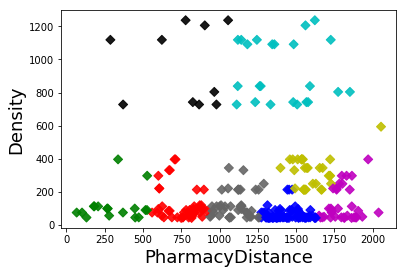

In [85]:
area =0.009* np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 3], X[:, 4], s=area, marker='D', c=label_color, alpha=0.9)
plt.xlabel('PharmacyDistance', fontsize=18)
plt.ylabel('Density', fontsize=18)

plt.show()


In [86]:
fresultH_PH_merged.head(5)

,MunicipalityName,HospitalName,HospitalLatitude,HospitalLongitude,PharmacyName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
0,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Sotiropoulou pharmacy (Φαρμακείο Σωτηροπούλου),38.021996,23.799477,1781,248.766667,4
1,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Pharmacy,37.994760,23.795063,1289,248.766667,7
2,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Pharmacy Fantidou,38.019905,23.803622,1609,248.766667,5
3,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Dr. Pharmacy,38.020636,23.797969,1629,248.766667,5
4,Agia Paraskevi,ΙΑΣΩ General,38.006005,23.79858,Martsoukas Pharmacy,38.021656,23.803836,1802,248.766667,4


In [87]:
fresultH_PH_merged.sort_values(['Density', 'PharmacyDistance'], ascending=[False, True], inplace=True)
fresultH_PH_merged.head(10)

,MunicipalityName,HospitalName,HospitalLatitude,HospitalLongitude,PharmacyName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
59,Chalandri,"General Hospital of Athens ""Giorgos Gennimatas",37.996760,23.783293,Pharmacy Angeliki Dragogianni (Φαρμακείο Αγγελ...,37.998847,23.774811,779,1236.533333,6
60,Chalandri,"General Hospital of Athens ""Giorgos Gennimatas",37.996760,23.783293,Pharmacy,37.994760,23.795063,1056,1236.533333,6
61,Chalandri,"General Hospital of Athens ""Giorgos Gennimatas",37.996760,23.783293,pharmacy ananiadis,37.996741,23.764802,1622,1236.533333,3
55,Marousi,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,38.046173,23.828541,KALTSOUNIS PHARMACY,38.038098,23.829667,904,1205.550000,6
54,Marousi,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,38.046173,23.828541,Pharmacy,38.032989,23.834611,1561,1205.550000,3
264,Kallithea,Γενική Κλινική Καλλιθέας,37.960376,23.697309,PharmacySpot.gr,37.958954,23.700054,288,1118.233333,6
265,Kallithea,Γενική Κλινική Καλλιθέας,37.960376,23.697309,Φαρμακείο Κ. Κουδούνας Δημήτριος,37.958041,23.703783,624,1118.233333,6
263,Kallithea,Animal Hospital,37.945365,23.671320,Φαρμακείο Κωνσταντινίδης Χρήστος,37.952438,23.680405,1120,1118.233333,3
262,Kallithea,Animal Hospital,37.945365,23.671320,pharmacyprime.gr (Φαρμακείο Τέσσυ Νοδάρα),37.953445,23.679346,1142,1118.233333,3
261,Kallithea,Animal Hospital,37.945365,23.671320,Pharmacy E.B.,37.952860,23.660801,1244,1118.233333,3


## So, we can clearly see that areas of two clustes are better suit our requirements:
## OPEN new Pharmacy store:
## *** big Density (Municipality Populaption per Hospital per number of Pharmacies) 
## *** near Hospital
## *** far away from other Pharmacies

In [88]:
d35 = fresultH_PH_merged[(fresultH_PH_merged.ClusterLabels==3) | (fresultH_PH_merged.ClusterLabels==6)]

In [89]:
d35

,MunicipalityName,HospitalName,HospitalLatitude,HospitalLongitude,PharmacyName,PharmacyLatitude,PharmacyLongitude,PharmacyDistance,Density,ClusterLabels
59,Chalandri,"General Hospital of Athens ""Giorgos Gennimatas",37.996760,23.783293,Pharmacy Angeliki Dragogianni (Φαρμακείο Αγγελ...,37.998847,23.774811,779,1236.533333,6
60,Chalandri,"General Hospital of Athens ""Giorgos Gennimatas",37.996760,23.783293,Pharmacy,37.994760,23.795063,1056,1236.533333,6
61,Chalandri,"General Hospital of Athens ""Giorgos Gennimatas",37.996760,23.783293,pharmacy ananiadis,37.996741,23.764802,1622,1236.533333,3
55,Marousi,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,38.046173,23.828541,KALTSOUNIS PHARMACY,38.038098,23.829667,904,1205.550000,6
54,Marousi,Σισμανόγλειο Γενικό Νοσοκομείο Αττικής,38.046173,23.828541,Pharmacy,38.032989,23.834611,1561,1205.550000,3
264,Kallithea,Γενική Κλινική Καλλιθέας,37.960376,23.697309,PharmacySpot.gr,37.958954,23.700054,288,1118.233333,6
265,Kallithea,Γενική Κλινική Καλλιθέας,37.960376,23.697309,Φαρμακείο Κ. Κουδούνας Δημήτριος,37.958041,23.703783,624,1118.233333,6
263,Kallithea,Animal Hospital,37.945365,23.671320,Φαρμακείο Κωνσταντινίδης Χρήστος,37.952438,23.680405,1120,1118.233333,3
262,Kallithea,Animal Hospital,37.945365,23.671320,pharmacyprime.gr (Φαρμακείο Τέσσυ Νοδάρα),37.953445,23.679346,1142,1118.233333,3
261,Kallithea,Animal Hospital,37.945365,23.671320,Pharmacy E.B.,37.952860,23.660801,1244,1118.233333,3


In [90]:
d35_map = folium.Map(location=[37.996760, 23.783293], zoom_start=12) # generate map centred for "Chalandri" Municipality


# add the Competitors Pharmacies as red circle markers
for lat, lng in zip(d35.PharmacyLatitude, d35.PharmacyLongitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(d35_map)
    
# add the Hospitals as blue circle markers
for lat, lng, label in zip(d35.HospitalLatitude, d35.HospitalLongitude, d35.HospitalName):
    folium.features.CircleMarker(
        [lat, lng],
        radius=8,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(d35_map)   

# display map
d35_map

# The best place to open new Pharmacy store is at "Chalandri" Municipality near Hospital "General Hospital of Athens "Giorgos Gennimatas""